In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from plotnine import *
from shapely.geometry import Point, Polygon
from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## 시각화 도구
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


# 반납 스테이션 ==0인 운영이력 데이터 분석

In [ ]:
df_OH_Mon = pd.read_csv('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/운영 이력 및 bike_Station 현황 분석/01.운영이력_ver1(한글컬럼, 이용거리).csv',index_col=0)

In [ ]:
df_OH_Mon

,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
0,15945541,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN,791.0
1,15945542,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN,2961.0
2,15945543,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
3,15945544,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN,829.0
4,15945545,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN,912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,21718608,2019-12-31 23:52:39,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN,377.0
3142684,21718610,2019-12-31 23:53:59,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN,240.0
3142685,21718611,2019-12-31 23:55:27,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN,657.0
3142686,21718613,2019-12-31 23:59:14,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN,685.0


In [ ]:
## 스테이션 번호 int->str로 변경
df_OH_Mon['대여 스테이션 번호']=df_OH_Mon[['대여 스테이션 번호']].astype('str')
df_OH_Mon['반납 스테이션 번호']=df_OH_Mon[['반납 스테이션 번호']].astype('str')

In [ ]:
# 월별 이용 횟수를 구하기 위해 월 단위로 데이터를 구분시켜 준다.
df_OH_Mon['대여 시간'] =df_OH_Mon['대여 시간'].apply(lambda x : x[:7])

In [ ]:
df_OH_Mon

,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
0,15945541,2017-01,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN,791.0
1,15945542,2017-01,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN,2961.0
2,15945543,2017-01,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
3,15945544,2017-01,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN,829.0
4,15945545,2017-01,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN,912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,21718608,2019-12,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN,377.0
3142684,21718610,2019-12,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN,240.0
3142685,21718611,2019-12,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN,657.0
3142686,21718613,2019-12,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN,685.0


### 월별 반납스테이션==0 대여 스테이션 이용 횟수 구하기

In [ ]:
## 반납 스테이션 = 0인 데이터 가져오기
df_OH_RTN_STATION_0 = df_OH_Mon[df_OH_Mon['반납 스테이션 번호']=='0']
df_OH_RTN_STATION_0

,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
2,15945543,2017-01,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
14,15945559,2017-01,234,15,2017-01-01 00:33:12,0,0,NaN,12,180418,0.0,1A84400000F51A,1.0,807.0
18,15945563,2017-01,229,5,2017-01-01 01:21:03,0,0,NaN,99,0,3185087.0,1A84400000050D,1.0,3600.0
21,15945566,2017-01,306,7,2017-01-01 01:24:36,0,0,NaN,99,0,3185091.0,1A844000000B56,1.0,3578.0
26,15945573,2017-01,213,22,2017-01-01 00:49:06,0,0,NaN,12,180418,0.0,1A844000000768,1.0,929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142655,21718573,2019-12,121,12,2020-01-01 00:15:09,0,0,NaN,1,236770,0.0,1A8440000006DD,1.0,3354.0
3142658,21718576,2019-12,214,3,2020-01-01 00:15:17,0,0,NaN,36,182974,0.0,1A84400000F532,1.0,3323.0
3142664,21718583,2019-12,343,15,2019-12-31 23:35:54,0,0,NaN,12,229770,0.0,1A84400000F823,1.0,601.0
3142679,21718602,2019-12,211,3,2020-01-01 00:40:49,0,0,NaN,12,196111,0.0,1A84400000FC8B,1.0,3386.0


### 월별 반납스테이션==0 대여 스테이션 이용 횟수 구하기(회원)

In [ ]:
## 회원
df_OH_RTN_STATION_0_Mem = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['회원 번호']!=0]
df_OH_RTN_STATION_0_Mem

,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
2,15945543,2017-01,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
14,15945559,2017-01,234,15,2017-01-01 00:33:12,0,0,NaN,12,180418,0.0,1A84400000F51A,1.0,807.0
26,15945573,2017-01,213,22,2017-01-01 00:49:06,0,0,NaN,12,180418,0.0,1A844000000768,1.0,929.0
28,15945575,2017-01,215,17,2017-01-01 01:34:31,0,0,NaN,2,187635,0.0,1A84400000F568,1.0,3600.0
69,15945624,2017-01,121,13,2017-01-01 01:21:52,0,0,NaN,3,187368,0.0,1A84400000F281,1.0,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142651,21718569,2019-12,322,20,2020-01-01 00:10:58,0,0,NaN,24,212145,0.0,1A8440000000B8,1.0,3360.0
3142655,21718573,2019-12,121,12,2020-01-01 00:15:09,0,0,NaN,1,236770,0.0,1A8440000006DD,1.0,3354.0
3142658,21718576,2019-12,214,3,2020-01-01 00:15:17,0,0,NaN,36,182974,0.0,1A84400000F532,1.0,3323.0
3142664,21718583,2019-12,343,15,2019-12-31 23:35:54,0,0,NaN,12,229770,0.0,1A84400000F823,1.0,601.0


#### 월별 대여스테이션 dataframe 만들기

In [ ]:
df_station_name_0 = df_OH_Mon['대여 스테이션 번호'].unique().tolist()
df_station_name_0.sort() 
len(df_station_name_0)
df_station_name_rent = pd.DataFrame(df_station_name_0, columns=['스테이션 번호'])
df_station_name_rent

,스테이션 번호
0,101
1,103
2,104
3,105
4,106
...,...
151,349
152,350
153,351
154,992


In [ ]:
# 3년치 데이터 월별로 분리 / dataframe 합쳐주기
M_2017_01 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-01'][:156].reset_index()['대여 시간']
df_2017_01= pd.concat([M_2017_01, df_station_name_rent ],axis=1)
M_2017_02 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-02'][:156].reset_index()['대여 시간']
df_2017_02= pd.concat([M_2017_02, df_station_name_rent ],axis=1)
M_2017_03 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-03'][:156].reset_index()['대여 시간']
df_2017_03= pd.concat([M_2017_03, df_station_name_rent ],axis=1)
M_2017_04 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-04'][:156].reset_index()['대여 시간']
df_2017_04= pd.concat([M_2017_04, df_station_name_rent ],axis=1)
M_2017_05 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-05'][:156].reset_index()['대여 시간']
df_2017_05= pd.concat([M_2017_05, df_station_name_rent ],axis=1)
M_2017_06 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-06'][:156].reset_index()['대여 시간']
df_2017_06= pd.concat([M_2017_06, df_station_name_rent ],axis=1)
M_2017_07 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-07'][:156].reset_index()['대여 시간']
df_2017_07= pd.concat([M_2017_07, df_station_name_rent ],axis=1)
M_2017_08 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-08'][:156].reset_index()['대여 시간']
df_2017_08= pd.concat([M_2017_08, df_station_name_rent ],axis=1)
M_2017_09 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-09'][:156].reset_index()['대여 시간']
df_2017_09= pd.concat([M_2017_09, df_station_name_rent ],axis=1)
M_2017_10 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-10'][:156].reset_index()['대여 시간']
df_2017_10= pd.concat([M_2017_10, df_station_name_rent ],axis=1)
M_2017_11 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-11'][:156].reset_index()['대여 시간']
df_2017_11= pd.concat([M_2017_11, df_station_name_rent ],axis=1)
M_2017_12 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2017-12'][:156].reset_index()['대여 시간']
df_2017_12= pd.concat([M_2017_12, df_station_name_rent ],axis=1)
M_2018_01 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-01'][:156].reset_index()['대여 시간']
df_2018_01= pd.concat([M_2018_01, df_station_name_rent ],axis=1)
M_2018_02 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-02'][:156].reset_index()['대여 시간']
df_2018_02= pd.concat([M_2018_02, df_station_name_rent ],axis=1)
M_2018_03 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-03'][:156].reset_index()['대여 시간']
df_2018_03= pd.concat([M_2018_03, df_station_name_rent ],axis=1)
M_2018_04 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-04'][:156].reset_index()['대여 시간']
df_2018_04= pd.concat([M_2018_04, df_station_name_rent ],axis=1)
M_2018_05 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-05'][:156].reset_index()['대여 시간']
df_2018_05= pd.concat([M_2018_05, df_station_name_rent ],axis=1)
M_2018_06 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-06'][:156].reset_index()['대여 시간']
df_2018_06= pd.concat([M_2018_06, df_station_name_rent ],axis=1)
M_2018_07 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-07'][:156].reset_index()['대여 시간']
df_2018_07= pd.concat([M_2018_07, df_station_name_rent ],axis=1)
M_2018_08 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-08'][:156].reset_index()['대여 시간']
df_2018_08= pd.concat([M_2018_08, df_station_name_rent ],axis=1)
M_2018_09 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-09'][:156].reset_index()['대여 시간']
df_2018_09= pd.concat([M_2018_09, df_station_name_rent ],axis=1)
M_2018_10 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-10'][:156].reset_index()['대여 시간']
df_2018_10= pd.concat([M_2018_10, df_station_name_rent ],axis=1)
M_2018_11 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-11'][:156].reset_index()['대여 시간']
df_2018_11= pd.concat([M_2018_11, df_station_name_rent ],axis=1)
M_2018_12 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2018-12'][:156].reset_index()['대여 시간']
df_2018_12= pd.concat([M_2018_12, df_station_name_rent ],axis=1)
M_2019_01 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-01'][:156].reset_index()['대여 시간']
df_2019_01= pd.concat([M_2019_01, df_station_name_rent ],axis=1)
M_2019_02 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-02'][:156].reset_index()['대여 시간']
df_2019_02= pd.concat([M_2019_02, df_station_name_rent ],axis=1)
M_2019_03 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-03'][:156].reset_index()['대여 시간']
df_2019_03= pd.concat([M_2019_03, df_station_name_rent ],axis=1)
M_2019_04 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-04'][:156].reset_index()['대여 시간']
df_2019_04= pd.concat([M_2019_04, df_station_name_rent ],axis=1)
M_2019_05 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-05'][:156].reset_index()['대여 시간']
df_2019_05= pd.concat([M_2019_05, df_station_name_rent ],axis=1)
M_2019_06 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-06'][:156].reset_index()['대여 시간']
df_2019_06= pd.concat([M_2019_06, df_station_name_rent ],axis=1)
M_2019_07 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-07'][:156].reset_index()['대여 시간']
df_2019_07= pd.concat([M_2019_07, df_station_name_rent ],axis=1)
M_2019_08 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-08'][:156].reset_index()['대여 시간']
df_2019_08= pd.concat([M_2019_08, df_station_name_rent ],axis=1)
M_2019_09 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-09'][:156].reset_index()['대여 시간']
df_2019_09= pd.concat([M_2019_09, df_station_name_rent ],axis=1)
M_2019_10 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-10'][:156].reset_index()['대여 시간']
df_2019_10= pd.concat([M_2019_10, df_station_name_rent ],axis=1)
M_2019_11 = df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-11'][:156].reset_index()['대여 시간']
df_2019_11= pd.concat([M_2019_11, df_station_name_rent ],axis=1)
M_2019_12 =df_OH_RTN_STATION_0[df_OH_RTN_STATION_0['대여 시간'] == '2019-12'][:156].reset_index()['대여 시간']
df_2019_12= pd.concat([M_2019_12, df_station_name_rent ],axis=1)

In [ ]:
df_station_name_rent_Mon = pd.concat([df_2017_01, df_2017_02, df_2017_03, df_2017_04, df_2017_05, df_2017_06, df_2017_07, df_2017_08, df_2017_09, df_2017_10, df_2017_11, df_2017_12, df_2018_01, df_2018_02, df_2018_03, df_2018_04, df_2018_05, df_2018_06, df_2018_07, df_2018_08, df_2018_09, df_2018_10,df_2018_11, df_2018_12, df_2019_01, df_2019_02, df_2019_03, df_2019_04, df_2019_05, df_2019_06, df_2019_07, df_2019_08, df_2019_09, df_2019_10, df_2019_11, df_2019_12],axis=0)
df_station_name_rent_Mon

,대여 시간,스테이션 번호
0,2017-01,101
1,2017-01,103
2,2017-01,104
3,2017-01,105
4,2017-01,106
...,...,...
151,2019-12,349
152,2019-12,350
153,2019-12,351
154,2019-12,992


In [ ]:
df_station_name_rent_Mon.reset_index(drop=True, inplace=True)

In [ ]:
df_station_name_rent_Mon

,대여 시간,스테이션 번호
0,2017-01,101
1,2017-01,103
2,2017-01,104
3,2017-01,105
4,2017-01,106
...,...,...
5611,2019-12,349
5612,2019-12,350
5613,2019-12,351
5614,2019-12,992


### 월 기준 스테이션 별 대여 스테이션 이용 횟수 구해주기(반납 스테이션==0)

#### 전체인원

In [ ]:
month_hour = df_OH_Mon['대여 시간'].unique().tolist()

In [ ]:
BikeStation_use_Mon_RNT0 = [] # 월별 대여 스테이션 이용 현황
for i in tqdm(month_hour):
    for j in df_station_name_0:
        BikeStation_use_Mon_RNT0.append(((df_OH_RTN_STATION_0['대여 시간']==i)&(df_OH_RTN_STATION_0['대여 스테이션 번호']==j)).sum())

In [ ]:
# 데이터 프레임 만들기(반납=0일때 전체인원 월별 대여스테이션_Count)
df_BikeStation_use_Mon_RNT0 = pd.DataFrame(BikeStation_use_Mon_RNT0, columns=['대여 스테이션_Count(반납 스테이션==0)'])
df_BikeStation_use_Mon_RNT0

,대여 스테이션_Count(반납 스테이션==0)
0,7
1,4
2,21
3,4
4,6
...,...
5611,32
5612,13
5613,36
5614,0


#### 회원

In [ ]:
BikeStation_use_Mon_RNT0_Mem = [] # 월별 대여 스테이션 이용 현황
for i in tqdm(month_hour):
    for j in df_station_name_0:
        BikeStation_use_Mon_RNT0_Mem.append(((df_OH_RTN_STATION_0_Mem['대여 시간']==i)&(df_OH_RTN_STATION_0_Mem['대여 스테이션 번호']==j)).sum())

In [ ]:
# 데이터 프레임 만들기(반납=0일때 회원 월별 대여스테이션_Count)
df_BikeStation_use_Mon_RNT0_Mem = pd.DataFrame(BikeStation_use_Mon_RNT0_Mem, columns=['회원 대여 스테이션_Count(반납 스테이션==0)'])
df_BikeStation_use_Mon_RNT0_Mem

#### 데이터 merge

In [ ]:
df_BikeStation_use_Mon_RNT0_all_1 = pd.concat([df_station_name_rent_Mon,df_BikeStation_use_Mon_RNT0,df_BikeStation_use_Mon_RNT0_Mem],axis=1) 
df_BikeStation_use_Mon_RNT0_all = df_BikeStation_use_Mon_RNT0_all_1.assign(TEST=lambda x: (x['대여 스테이션_Count(반납 스테이션==0)']-x['회원 대여 스테이션_Count(반납 스테이션==0)']))
df_BikeStation_use_Mon_RNT0_all.columns = ['대여 시간','스테이션 번호','대여 스테이션_Count(반납 스테이션==0)','회원 대여 스테이션_Count(반납 스테이션==0)','비회원 대여 스테이션_Count(반납 스테이션==0)']
df_BikeStation_use_Mon_RNT0_all

,대여 시간,스테이션 번호,대여 스테이션_Count(반납 스테이션==0),회원 대여 스테이션_Count(반납 스테이션==0),비회원 대여 스테이션_Count(반납 스테이션==0)
0,2017-01,101,7,3,4
1,2017-01,103,4,2,2
2,2017-01,104,21,14,7
3,2017-01,105,4,2,2
4,2017-01,106,6,4,2
...,...,...,...,...,...
5611,2019-12,349,32,29,3
5612,2019-12,350,13,11,2
5613,2019-12,351,36,35,1
5614,2019-12,992,0,0,0


#### 3년간 대여 스테이션 이용 횟수(반납 스테이션==0)

In [ ]:
# 3년간 LEAS_STATION 이용 횟수 ('반납 스테이션=0')
df_OH_RTN_STATION_0_3year_Count = (df_OH_RTN_STATION_0.groupby(df_OH_RTN_STATION_0['대여 스테이션 번호'])).count()
df_OH_RTN_STATION_0_3year_Count_1 = df_OH_RTN_STATION_0_3year_Count[['반납 스테이션 번호']]
df_OH_RTN_STATION_0_3year_Count_1.columns = ['대여 스테이션 _Count']
df_OH_RTN_STATION_0_3year_Count_end = df_OH_RTN_STATION_0_3year_Count_1.reset_index()
df_OH_RTN_STATION_0_3year_Count_end


,대여 스테이션 번호,대여 스테이션 _Count
0,101,1115
1,103,792
2,104,1845
3,105,599
4,106,757
...,...,...
151,349,1524
152,350,794
153,351,139
154,992,152


In [ ]:
df_OH_RTN_STATION_0_3year_Count_end['대여 스테이션 번호']=df_OH_RTN_STATION_0_3year_Count_end[['대여 스테이션 번호']].astype('str') # 타입 변경

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


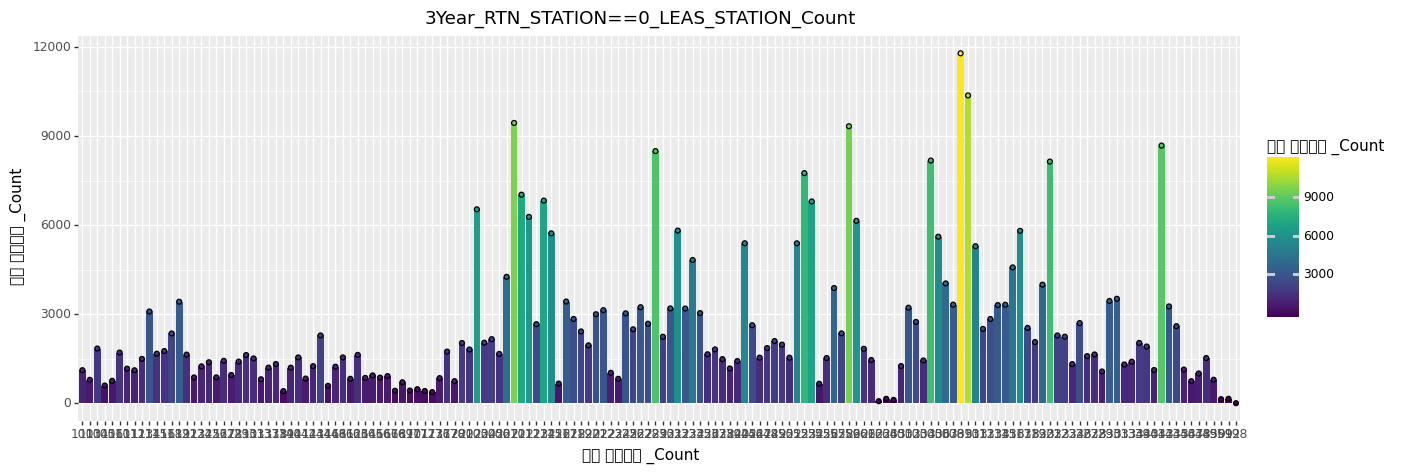

<ggplot: (-9223363252888822156)>

In [ ]:
## 시각화
(ggplot(df_OH_RTN_STATION_0_3year_Count_end)
+ aes(x = '대여 스테이션 번호', y = '대여 스테이션 _Count', fill = '대여 스테이션 _Count')
+ geom_bar(stat = 'identity') 
+ geom_point()
# + geom_hline(yintercept = 0.581100,color='red',size=0.5) # 25
# + geom_hline(yintercept = 0.954750,color='green',size=0.5) #50
# + geom_hline(yintercept = 2.012100,color='blue',size=0.5) # 75
+ labs(x='대여 스테이션 _Count', y='대여 스테이션 _Count', title = '3Year_RTN_STATION==0_LEAS_STATION_Count')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (15,5)) 
)

#### 데이터 프레임 저장

In [ ]:
df_BikeStation_use_Mon_RNT0_all.to_csv('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/분실 자전거 분석(station=0)/전체_회원_비회원_반납==0_대여스테이션 월별 이용 현황.csv')
df_OH_RTN_STATION_0_3year_Count_end.to_csv('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/분실 자전거 분석(station=0)/반납 스테이션==0_3년간 대여 스테이션 이용 횟수.csv')